In [1]:
import sys

sys.path.insert(1, '/Users/users/spirov/ThesisProject/Executable')

import numpy as np
import torch
from torch.utils.data import DataLoader
from torch import nn
from NeuralNets import CustomVaexDataset, printNodes, sc, StraightNetwork,Unet,Stefann
from matplotlib import pyplot as plt

from torch.nn.modules.loss import _Loss

from torch.utils.data import Dataset

import vaex
import os

from DataCore import snapshotPath,L


from cycler import cycler


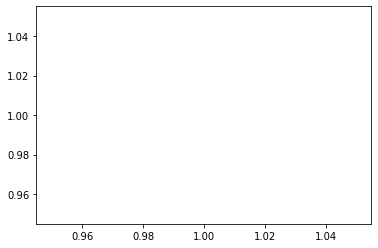

In [2]:


plt.plot([1],[1])

font = {"weight": "normal", "size": 14}
plt.rcParams["axes.linewidth"] = 1.5  # set the value globally
plt.rc("font", **font)
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
_legend = {"frameon": True, "framealpha":0.7}
plt.rc("legend", **_legend)
plt.rcParams["axes.prop_cycle"] = cycler("color",('indigo','b','r','k','#ff7f0e','g'))
plt.show()

In [58]:
lim = 1  #datapoint reduction factor
sc = 3.75e4   #scaling factor to allow model to behave itself

#l = int(DataSizeLimit/lim)
#n = int(2**int(np.log2(l)-1))
# f = 20


In [42]:
sgd = "modelSnapshot-Copy1.pt"
adam = "EYOOOOOOO.pt"


GoodPath = "/Users/users/spirov/ThesisProject/Snapshots/" + adam#sgd

torch.set_default_dtype(torch.float64)

model =Unet() #BottleneckNetwork() # StraightNetwork() #
sd = torch.load(GoodPath,map_location=torch.device('cpu'))




In [43]:
model.load_state_dict(sd)


<All keys matched successfully>

In [44]:



dataPath = "/Users/users/spirov/Blk/Nexus Project/Thesis-Project-Cosmic-Web/Data/Testing/"



dataset = CustomVaexDataset(dataPath)

img, label = dataset.__getitem__(0)

with torch.no_grad():
    mod = model(img.reshape(1,3,len(label)))


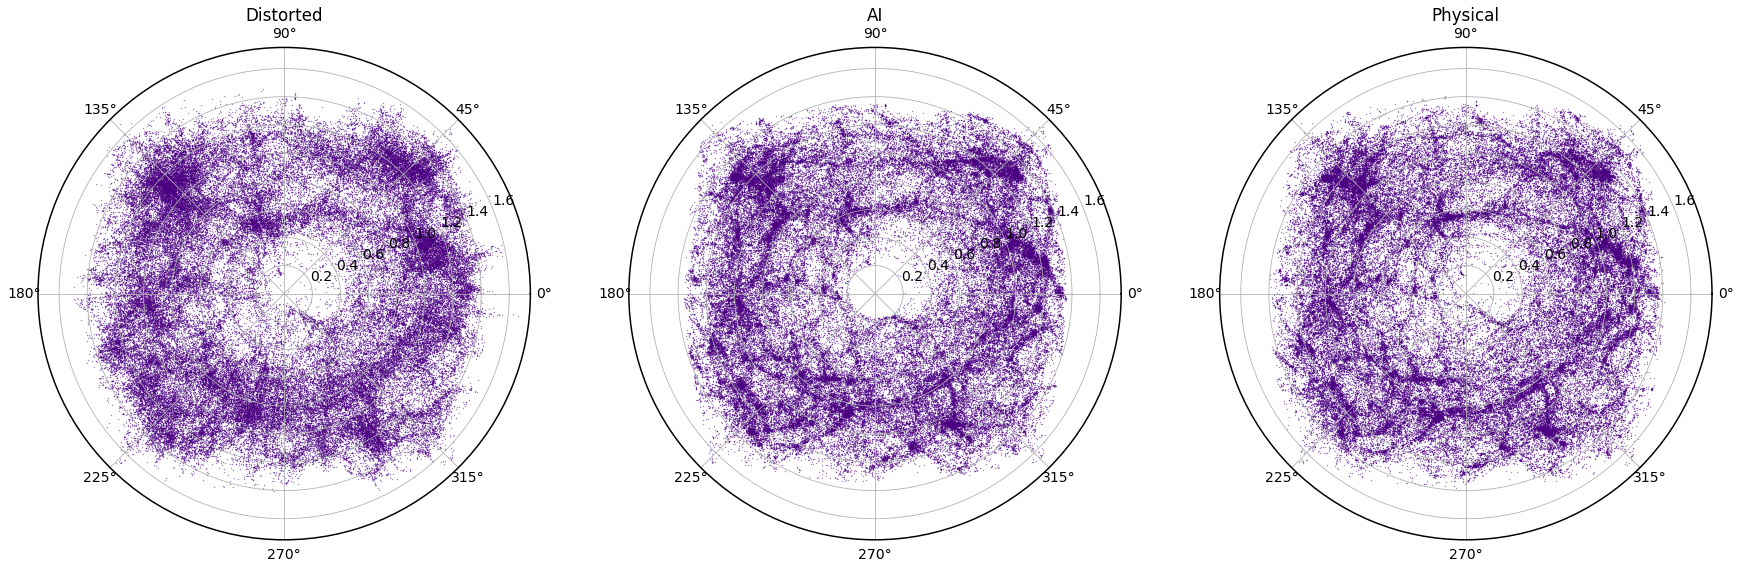

In [51]:
siz = 0.1

plt.figure(figsize=(30,10))
plt.subplot(131,projection="polar")
plt.ylim(0,1.75)
plt.scatter(img[2],img[0],s=siz,alpha=0.7)
plt.title("Distorted")
plt.subplot(132,projection="polar")
plt.ylim(0,1.75)
plt.scatter(img[2],mod,s=siz,alpha=0.7)
plt.title("AI")
plt.subplot(133,projection="polar")
plt.ylim(0,1.75)
plt.scatter(img[2],label,s=siz,alpha=0.7)
plt.title("Physical")
plt.show()

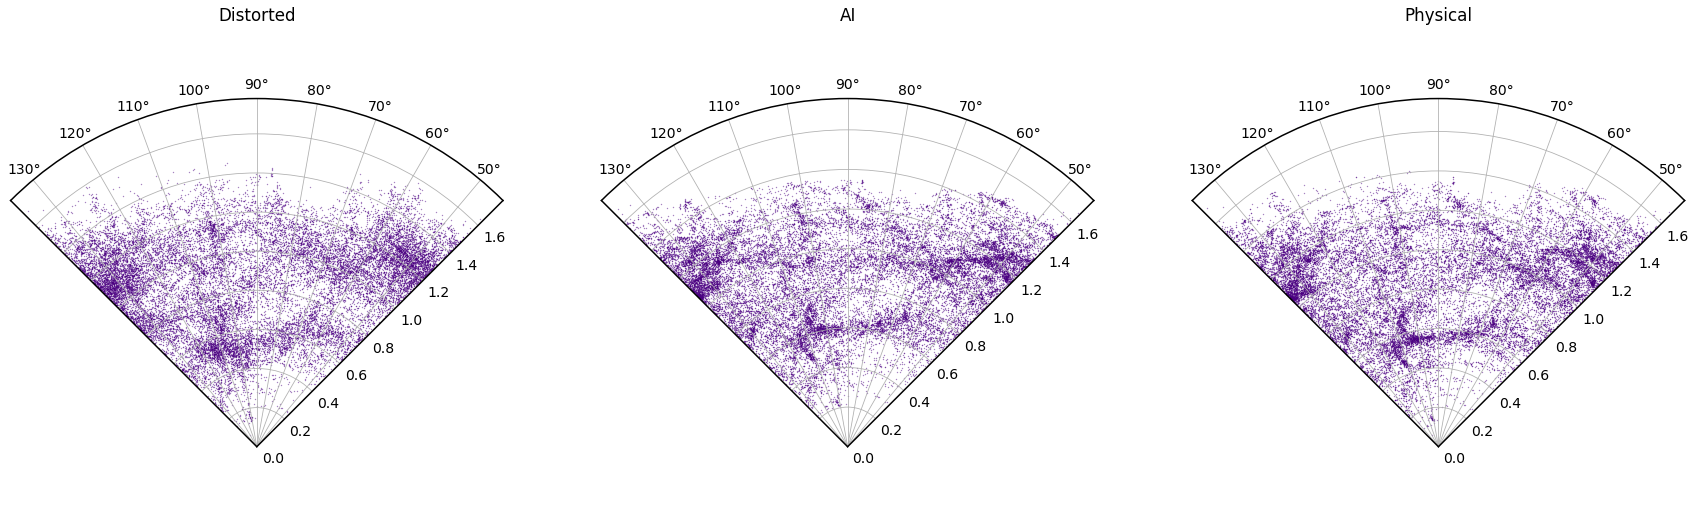

In [52]:
siz = 0.1

y1, y2 = 45,135

plt.figure(figsize=(30,10))
plt.subplot(131,projection="polar")
plt.scatter(img[2],img[0],s=siz,alpha=0.7)
plt.xlim(y1*(2*np.pi)/360,y2*(2*np.pi)/360)


plt.title("Distorted")
plt.subplot(132,projection="polar")
plt.scatter(img[2],mod,s=siz,alpha=0.7)
plt.title("AI")
plt.xlim(y1*(2*np.pi)/360,y2*(2*np.pi)/360)


plt.subplot(133,projection="polar")
plt.scatter(img[2],label,s=siz,alpha=0.7)
plt.title("Physical")
plt.xlim(y1*(2*np.pi)/360,y2*(2*np.pi)/360)
plt.show()

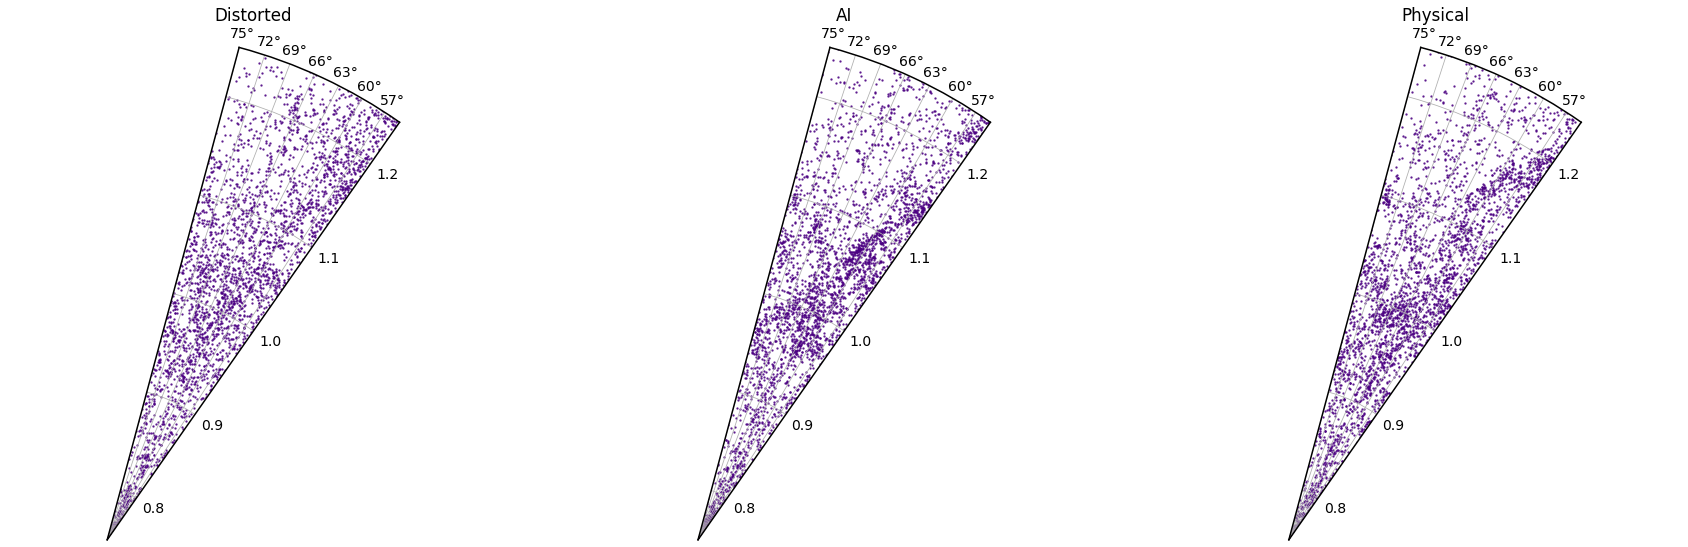

In [53]:
siz = 2

y1, y2 = 55,75

plt.figure(figsize=(30,10))
plt.subplot(131,projection="polar")
plt.scatter(img[2],img[0],s=siz,alpha=0.7)
plt.xlim(y1*(2*np.pi)/360,y2*(2*np.pi)/360)
plt.ylim(0.75,1.25)

plt.title("Distorted")
plt.subplot(132,projection="polar")
plt.scatter(img[2],mod,s=siz,alpha=0.7)
plt.title("AI")
plt.xlim(y1*(2*np.pi)/360,y2*(2*np.pi)/360)
plt.ylim(0.75,1.25)

plt.subplot(133,projection="polar")
plt.scatter(img[2],label,s=siz,alpha=0.7)
plt.title("Physical")
plt.xlim(y1*(2*np.pi)/360,y2*(2*np.pi)/360)
plt.ylim(0.75,1.25)
plt.show()

In [54]:
def showRegion(R,th,fi,cx,cy,cz,size=0.5,ax=None):
    z = R*np.cos(fi)
    y = R*np.sin(fi)*np.sin(th)
    x = R*np.sin(fi)*np.cos(th)
    
  #  print(x.min(),y.min(),z.min())
  #  print(x.max(),y.max(),z.max())
    
    #return x,y,z
    
    
    fx = (x<cx+size/2)*(x>cx-size/2)
    fy = (y<cy+size/2)*(y>cy-size/2)
    fz = (z<cz+size/2)*(z>cz-size/2)
    
    f = fx*fy*fz
    
    
    
    if not ax:
        ax = plt.subplot(projection='3d')
    ax.plot(x[f],y[f],z[f],linestyle='',marker='.',markersize=5)
    
    
    ax.set_xlim(cx-size/2,cx+size/2)    
    ax.set_ylim(cy-size/2,cy+size/2)
    ax.set_zlim(cz-size/2,cz+size/2)# (cx-size/2,cx+size/2),(cy-size/2,cy+size/2),(cz-size/2,cz+size/2))
#    print()
    #plt.show()
    
    

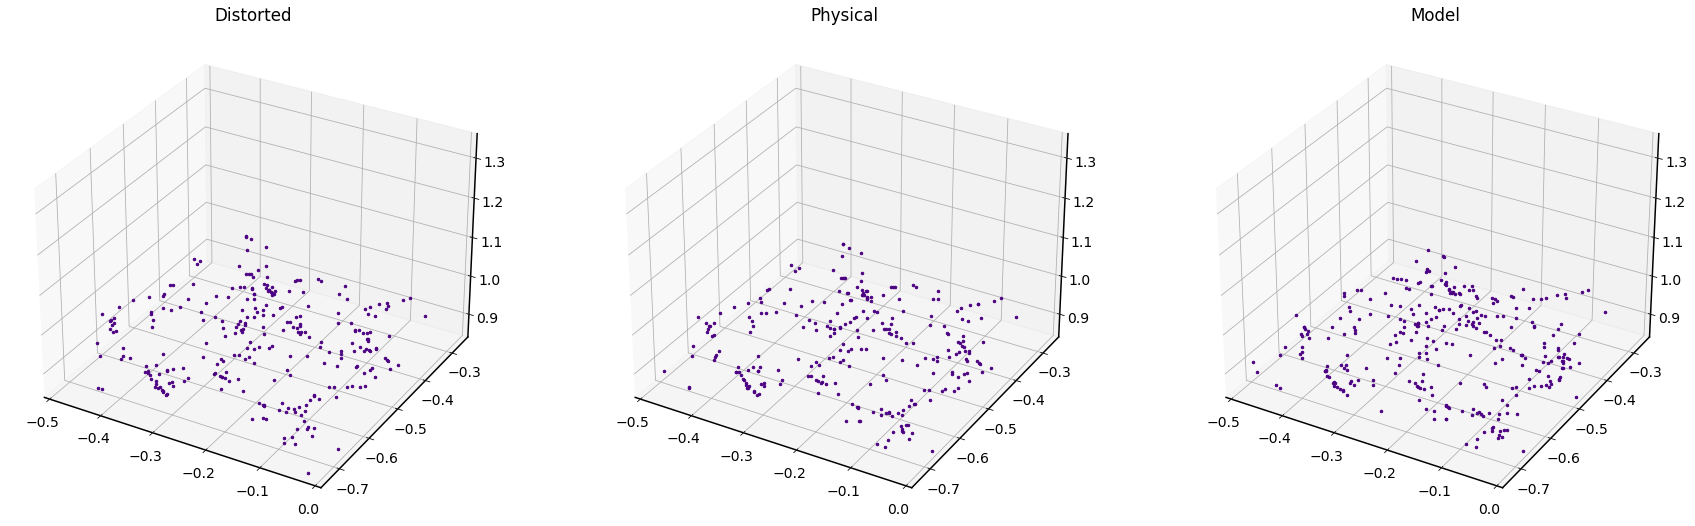

In [55]:
plt.figure(figsize=(30,10))

ax1 =plt.subplot(131,projection='3d')
ax1.set_title("Distorted")
ax2 =plt.subplot(132,projection='3d')
ax2.set_title("Physical")
ax3 =plt.subplot(133,projection='3d')
ax3.set_title("Model")

showRegion(img[0],img[2],img[1],-0.25,-0.5,1.1,ax=ax1)
showRegion(label,img[2],img[1],-0.25,-0.5,1.1,ax=ax2)
showRegion(mod,img[2],img[1],-0.25,-0.5,1.1,ax=ax3)

In [62]:
kdf = vaex.open("./kernelSurvivor.hdf5")

In [95]:
m1 = L/2*(370-256)/256
m2 = L/2*(450-256)/256

In [98]:
kdf

#,R,Fi,Th,CZ,model,X,Y,Z,phX,phY,phZ,mX,mY,mZ
0,0.6970897724975467,3.0841672228186328,0.3807840704591012,0.6735200575637551,0.7119808194312038,-9699.199218749998,557.5937500000015,24268.48828125,-9371.253852613105,538.7406176562614,23447.93205846431,-9906.390941371068,569.5049198790475,24786.90529475779
1,0.6757790382484218,-3.0235861870478407,0.42587821511608087,0.7876176928139711,0.6924857969123988,-10396.376953124998,-1232.56640625,23078.09765625,-12116.934628023402,-1436.5510828019533,26897.428007924143,-10653.398480732281,-1263.038185220709,23648.639484487245
2,0.6828281871963858,3.0465721782492885,0.39063877059218305,0.8964213357791373,0.6947816559731084,-9706.268554687498,925.0800781249976,23677.05078125,-12742.453206199534,1214.451211717448,31083.388012707004,-9876.184765357302,941.2743654101167,24091.53702031492
3,0.6499088538087485,3.075873491862033,0.4367188264380599,0.8379663476455247,0.6544019397194711,-10286.159179687493,676.97265625,22084.171875,-13262.560109143706,872.8613264601528,28474.443359892353,-10357.271608168589,681.6528453040737,22236.848794109548
4,0.7239670351648047,3.0620623249781946,0.3419232189590683,0.4378959639136772,0.7353693919841797,-9074.1962890625,723.19921875,25577.1640625,-5488.584062168509,437.4315453797683,15470.506759713291,-9217.113326594997,734.5894825923358,25980.00001621429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"111,987",1.0665043479731418,2.048355139822626,1.6096837230037067,1.0304127659808882,1.0423372848810912,-18367.804687500007,35492.52343749999,-1554.8671875000014,-17746.219665220004,34291.42067388634,-1502.2489148306297,-17951.588949056106,34688.26037486901,-1519.6337883193185
"111,988",1.1283216815201351,-2.446416893675759,0.9599477458188982,1.1679708245004494,1.1286576749638595,-26617.160156250004,-22200.705078125,24268.625,-27552.485255510048,-22980.836262629462,25121.42274227529,-26625.086256979554,-22207.316039763406,24275.851750156235
"111,989",0.8608218817265553,2.407712655664305,0.9460785455292607,0.8254622122943934,0.8634730498969598,-19443.6640625,17536.810546875004,18880.03125,-18644.983698542426,16816.457315857897,18104.503027448438,-19503.546860989212,17590.82059810539,18938.178166300324
"111,990",1.4754492219569182,-2.181712754983783,2.287173447023059,1.437201960468251,1.4613052591486204,-23936.41796875001,-34181.023437500015,-36332.38281249999,-23315.927325270888,-33294.96750151166,-35390.55836659126,-23706.958492628673,-33853.35704474653,-35984.09304177155


In [99]:
zdf = kdf[(kdf.Z>m1)*(kdf.Z<m2)]

(-9375.0, 9375.0)

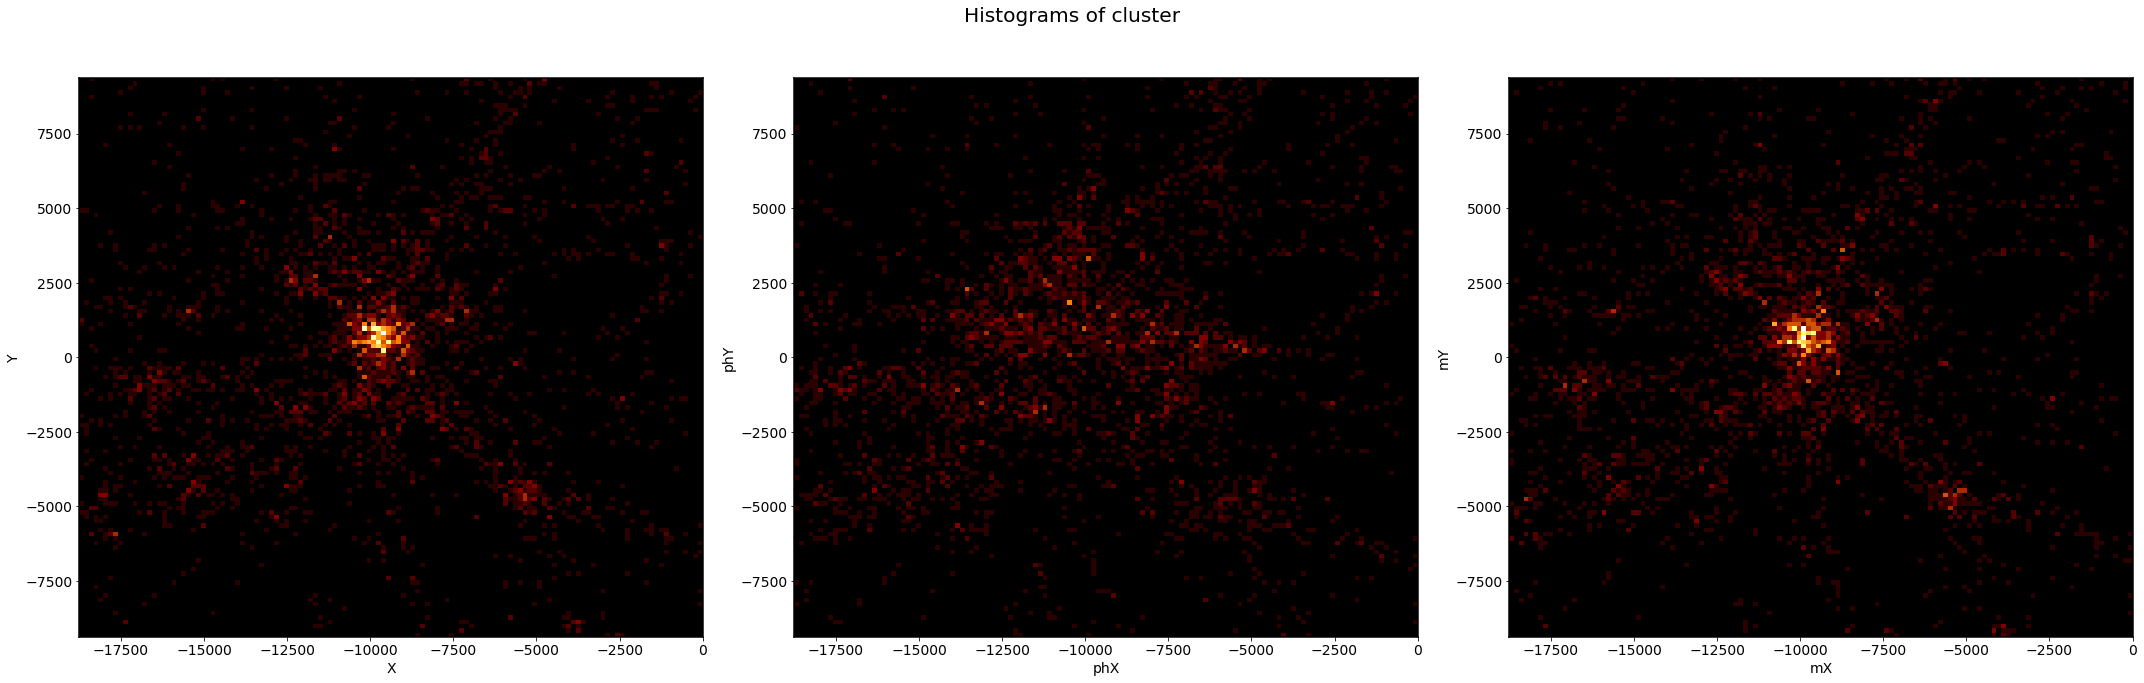

In [126]:
L = 75000
plt.figure(figsize=(30,10))
zdf.viz.heatmap((("X","Y"),("phX","phY"),("mX","mY")),shape=128,limits=(((-L/4,0),(-L/8,L/8)),((-L/4,0),(-L/8,L/8)),((-L/4,0),(-L/8,L/8))),title="Histograms of cluster")
plt.xlim()
plt.ylim(-L/8,L/8)


Text(0.5, 0.98, 'Scatterplots of Cluster')

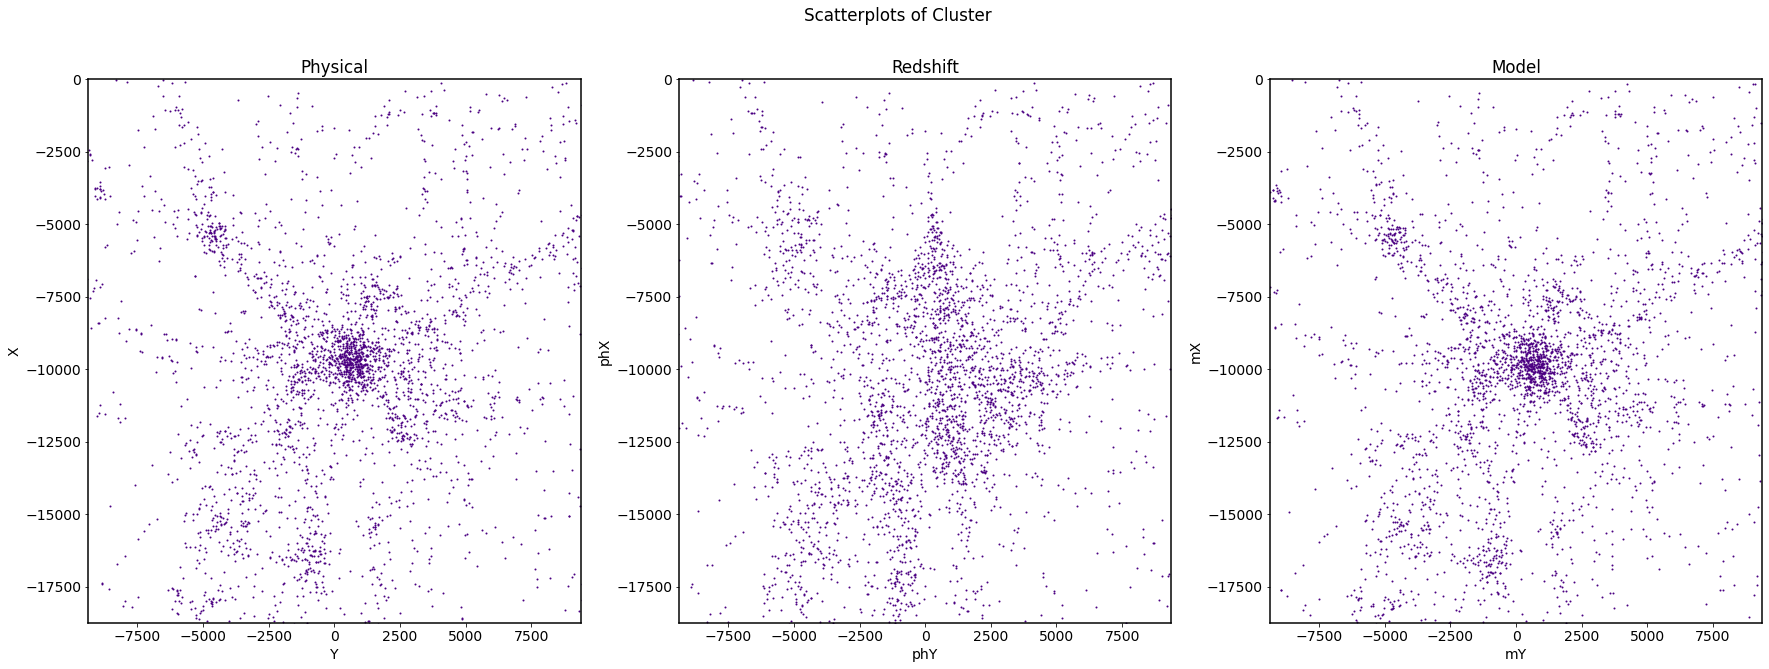

In [121]:
plt.figure(figsize=(30,10))
plt.subplot(131)
zdf.viz.scatter("Y","X",s=1)
plt.ylim(-L/4,0)
plt.xlim(-L/8,L/8)
plt.title("Physical")
plt.subplot(132)
zdf.viz.scatter("phY","phX",s=1)
plt.ylim(-L/4,0)
plt.xlim(-L/8,L/8)
plt.title("Redshift")
plt.subplot(133)
zdf.viz.scatter("mY","mX",s=1)
plt.ylim(-L/4,0)
plt.xlim(-L/8,L/8)
plt.title("Model")
plt.suptitle("Scatterplots of Cluster")